<a href="https://colab.research.google.com/github/ShashiPriya9/CaseStudy-on-Walmart-Central-limit-theorem-/blob/main/Project_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#1.Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.


In [ ]:
df.shape

(550068, 10)

INSIGHTS: Number of rows are 550068 and columns are 10 in this dataset.

In [ ]:
df.ndim

2

INSIGHTS: It is 2 dimensional dataset.

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
#2.Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)


In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

INSIGHTS:Hence there are no null values in this dataset.

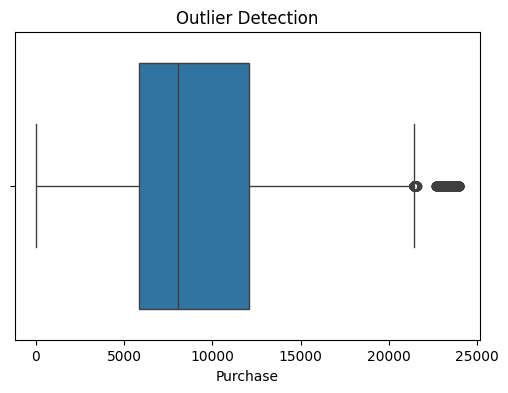

In [ ]:
#Finding outliers

plt.figure(figsize=(6,4))
sns.boxplot(data=df['Purchase'],orient= 'h')
plt.title('Outlier Detection')

plt.show()

INSIGHTS: By this Boxplot, we understood that there are many outliers in this Purchase-Continous variable.

In [ ]:
#Remove/clip the data between the 5 percentile and 95 percentile
remove_Purchase = np.clip(df['Purchase'], np.percentile(df['Purchase'],5), np.percentile(df['Purchase'],95))

<Axes: xlabel='Purchase'>

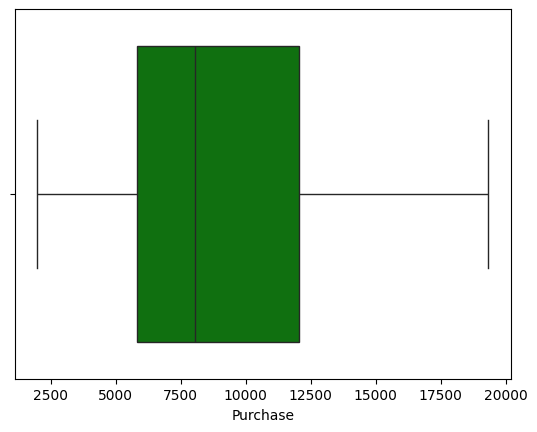

In [ ]:
sns.boxplot(data=df, x=remove_Purchase,color='g')

INSIGHTS: Using "remove" function removed all the outliers present in the Purchase varibale.

In [ ]:
#3.Do some data exploration steps like:

#Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers,
#calculate the average, and conclude the results.

Transaction_vc=df.groupby(['Purchase'])['Product_ID'].value_counts()
Transaction_gvc=df.groupby(['Purchase'])['Gender'].value_counts()
Transaction_gvc

Purchase  Gender
12        M         74
          F         27
13        M         81
          F         25
14        M         65
                    ..
23958     M          4
23959     M          1
          F          1
23960     M          4
23961     M          3
Name: count, Length: 32251, dtype: int64

INSIGHTS: By this I understood, male are high in spending more amount per transaction than female.

In [ ]:
#a. What products are different age groups buying?

df.groupby('Age')['Product_ID'].count().reset_index(name='Product')


,Age,Product
0,0-17,15102
1,18-25,99660
2,26-35,219587
3,36-45,110013
4,46-50,45701
5,51-55,38501
6,55+,21504


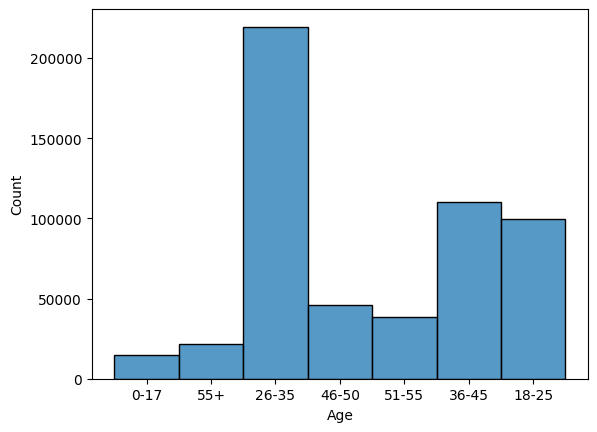

In [ ]:
sns.histplot(data=df,x='Age',bins=10)
plt.show()


INSIGHTS:


*Age group 0-17 has the Product buying count 15102.
*Age group 18-25 has the Product buying count 99660.
*Age group 26-35 has the Product buying count 219587.
*Age group 36-45 has the Product buying count 110013.
*Age group 46-50 has the Product buying count 45701.
*Age group 51-55 has the Product buying count 38501.
*Age group 55+ has the Product buying count 21504.



Age group 26-35 has the more count 219587 of Product than other Age groups.

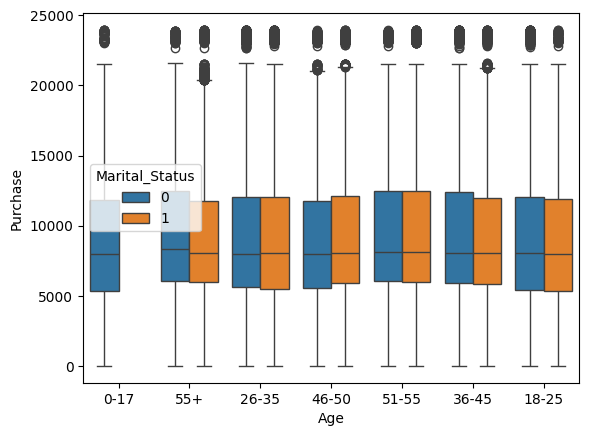

In [ ]:
#b. Is there a relationship between age, marital status, and the amount spent?

sns.boxplot(data=df, x="Age", y="Purchase", hue="Marital_Status")
plt.show()


INSIGHTS: By this boxplot, I understood male and female are almost have same relation in all the age groups mentioned except in 0-17 age group, in this female are not involved.

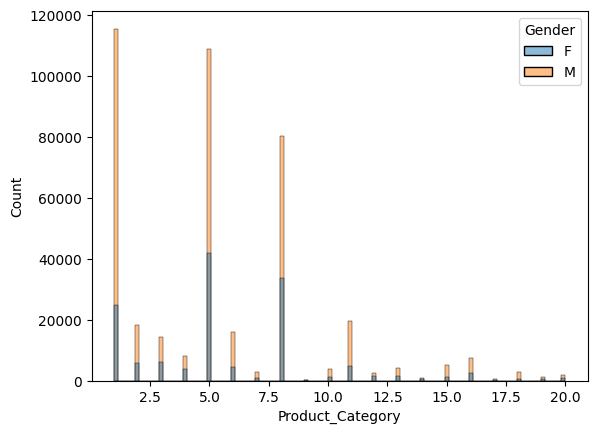

In [ ]:
#c. Are there preferred product categories for different genders?

sns.histplot(data=df, x="Product_Category", hue="Gender")
plt.show()

INSIGHTS: By this Histplot, got that male took higher place in Product Category than female.

In [ ]:
##4. How does gender affect the amount spent?

def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower_bound = np.percentile(means, (100 - ci) / 2)
    upper_bound = np.percentile(means, 100 - (100 - ci) / 2)
    return lower_bound, upper_bound, means

sample_sizes = [300, 3000, 30000]

# Gender
genders = df['Gender'].unique()
ci_gender_full = {}
ci_gender_samples = {size: {} for size in sample_sizes}

for gender in genders:
    gender_purchase = df[df['Gender'] == gender]['Purchase']
    ci_gender_full[gender], gender_means = bootstrap_ci(gender_purchase)[:2], bootstrap_ci(gender_purchase)[2]

    for size in sample_sizes:
        if len(gender_purchase) >= size:
            gender_sample = np.random.choice(gender_purchase, size=size, replace=False)
        else:
            gender_sample = np.random.choice(gender_purchase, size=size, replace=True)
        ci_gender_samples[size][gender], gender_means_sample = bootstrap_ci(gender_sample)[:2], bootstrap_ci(gender_sample)[2]

    print(f"95% CI for gender {gender}: {ci_gender_full[gender]}")

    for size in sample_sizes:
        print(f"Sample size {size} for gender {gender}: CI {ci_gender_samples[size][gender]}")

    # Widths of CI
    ci_gender_width = ci_gender_full[gender][1] - ci_gender_full[gender][0]
    print(f"Width of full dataset CI for gender {gender}: {ci_gender_width}")


95% CI for gender F: (8708.360968713414, 8759.645756724516)
Sample size 300 for gender F: CI (7837.919416666667, 8760.013500000001)
Sample size 3000 for gender F: CI (8731.480341666667, 9100.035474999999)
Sample size 30000 for gender F: CI (8723.918874166666, 8830.418601666668)
Width of full dataset CI for gender F: 51.28478801110214
95% CI for gender M: (9421.374022169706, 9452.808282318549)
Sample size 300 for gender M: CI (8724.898416666667, 9827.211416666665)
Sample size 3000 for gender M: CI (9230.100925, 9578.649691666667)
Sample size 30000 for gender M: CI (9426.536141666667, 9542.801044166667)
Width of full dataset CI for gender M: 31.43426014884244


In [ ]:
#i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
gender_widths = {gender: ci_gender_full[gender][1] - ci_gender_full[gender][0] for gender in genders}
max_width_gender = max(gender_widths, key=gender_widths.get)
print(f"Wider confidence interval gender: {max_width_gender}")


Wider confidence interval gender: F


INSIGHTS: Confidence interval was wider in the case of Female.

In [ ]:
#ii. How is the width of the confidence interval affected by the sample size?
ci_widths_gender = {gender: [ci_gender_samples[size][gender][1] - ci_gender_samples[size][gender][0] for size in sample_sizes] for gender in genders}
print(f"Widths of CI for gender F,M: {ci_widths_gender}")


Widths of CI for gender F,M: {'F': [922.0940833333343, 368.55513333333147, 106.49972750000234], 'M': [1102.3129999999983, 348.5487666666668, 116.26490249999915]}


INSIGHTS: As the sample size increases, the width of the confidence interval decreases.

In [ ]:
#iii. Do the confidence intervals for different sample sizes overlap?
ci_overlap_gender = {gender: all([ci_gender_samples[size][gender][0] < ci_gender_full[gender][1] and ci_gender_samples[size][gender][1] > ci_gender_full[gender][0] for size in sample_sizes]) for gender in genders}
print(f"Do the confidence intervals for different sample sizes overlap for genders? {ci_overlap_gender}")

Do the confidence intervals for different sample sizes overlap for genders? {'F': True, 'M': True}


INSIGHTS: By the code we understood that Confidence intervals for sample size overlaps.

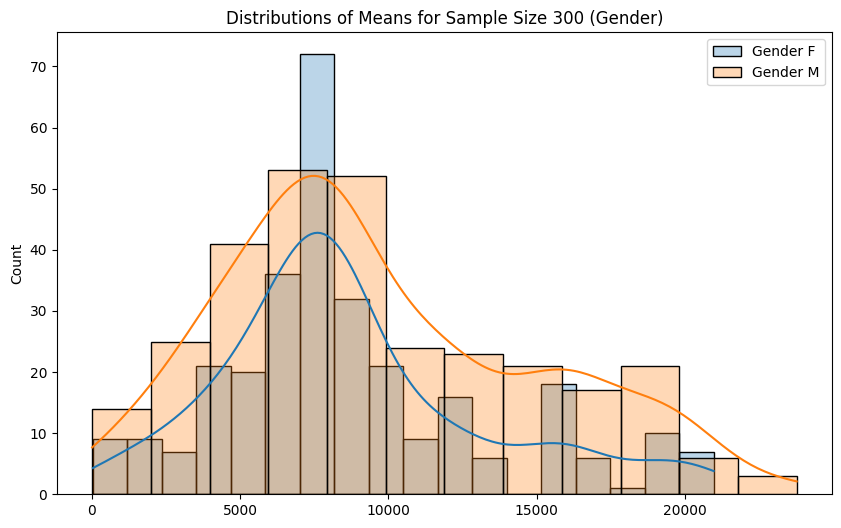

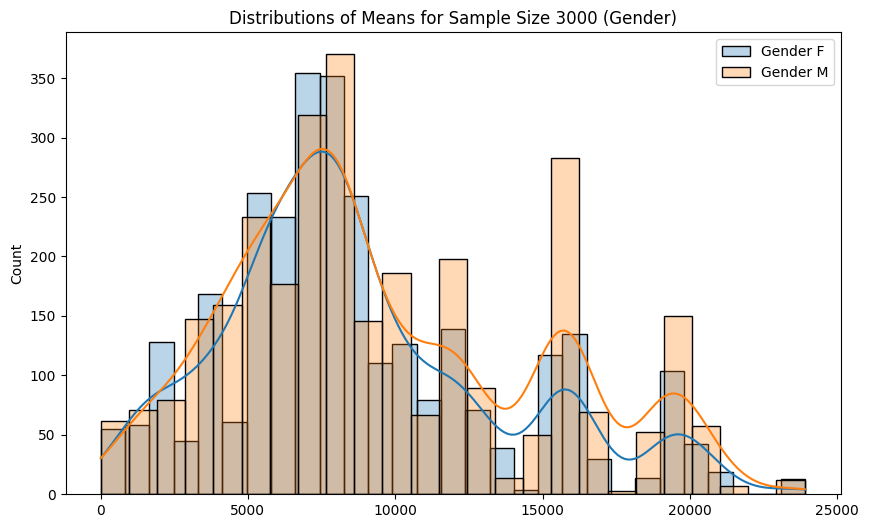

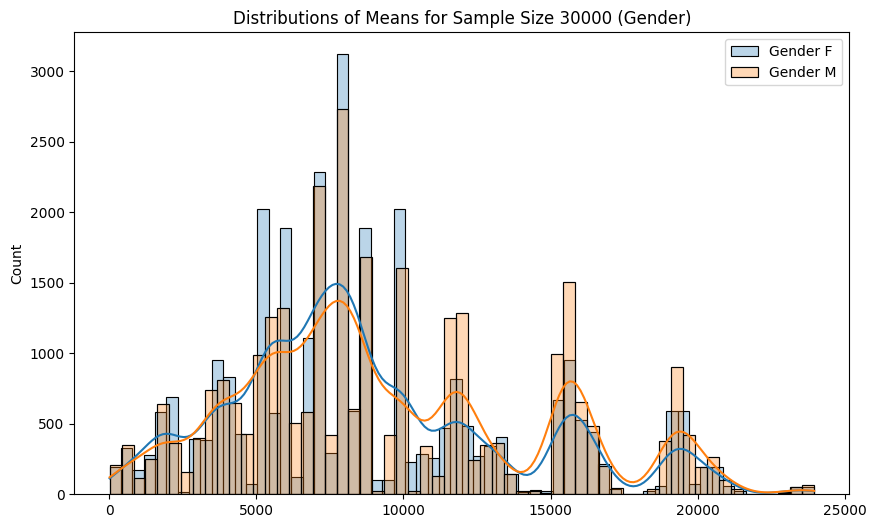

In [ ]:
#iv. How does the sample size affect the shape of the distributions of the means?
for size in sample_sizes:
    plt.figure(figsize=(10, 6))
    for gender in genders:
        gender_means = np.random.choice(df[df['Gender'] == gender]['Purchase'], size=len(df[df['Gender'] == gender]), replace=True)
        sample_means = np.random.choice(gender_means, size=size, replace=False) if len(gender_means) >= size else np.random.choice(gender_means, size=size, replace=True)
        sns.histplot(sample_means,kde=True, label=f'Gender {gender}', alpha=0.3)
    plt.legend()
    plt.title(f'Distributions of Means for Sample Size {size} (Gender)')
    plt.show()

INSIGHTS: By seeing the graph we can understand that larger the sample size, narrower the distribution.

In [ ]:
Inferences:
# i) Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
'''
# The width of a confidence interval indicates the uncertainty in the estimate. A wider confidence interval suggests that the true mean is less certain.
# In this case, the wider confidence interval for one gender implies that the average purchase amount for that gender is less certain.
#This could be due to a number of factors, such as a greater variability in purchase amounts or a smaller sample size.
'''

# ii) How is the width of the confidence interval affected by the sample size?
'''
As the sample size increases, the two groups start to become distinct.
With increasing sample size, Standard error of the mean in the samples decreases.

'''
#iii) Do the confidence intervals for different sample sizes overlap?
'''
# Yes, the confidence intervals for different sample sizes can overlap.
#Increasing the sample size causes the error bound to decrease, making the confidence interval narrower.
#Decreasing the sample size causes the error bound to increase, making the confidence interval wider.
'''
#iv)How does the sample size affect the shape of the distributions of the means?
'''
# The shape of the distribution of the means becomes more normal as the sample size increases.
# This is because the CLT states that the distribution of sample means will approach a normal distribution as the sample size increases,
regardless of the shape of the population distribution.
'''


#Recommendations:
'''
In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently.
Adding some additional offers for women can increase their spending on Black Friday.
'''

In [ ]:
##5. How does Marital_Status affect the amount spent?

# Marital Status
marital_statuses = df['Marital_Status'].unique()
ci_marital_full = {}
ci_marital_samples = {size: {} for size in sample_sizes}

for status in marital_statuses:
    status_purchase = df[df['Marital_Status'] == status]['Purchase']
    ci_marital_full[status], status_means = bootstrap_ci(status_purchase)[:2], bootstrap_ci(status_purchase)[2]

    for size in sample_sizes:
        if len(status_purchase) >= size:
            status_sample = np.random.choice(status_purchase, size=size, replace=False)
        else:
            status_sample = np.random.choice(status_purchase, size=size, replace=True)
        ci_marital_samples[size][status], status_means_sample = bootstrap_ci(status_sample)[:2], bootstrap_ci(status_sample)[2]

    print(f"95% CI for marital status {status}: {ci_marital_full[status]}")

    for size in sample_sizes:
        print(f"Sample size {size} for marital status {status}: CI {ci_marital_samples[size][status]}")

    # Calculating widths of the confidence intervals
    ci_marital_width = ci_marital_full[status][1] - ci_marital_full[status][0]
    print(f"Width of full dataset CI for marital status {status}: {ci_marital_width}")


95% CI for marital status 0: (9248.902747966778, 9283.391212726843)
Sample size 300 for marital status 0: CI (8441.792083333334, 9656.4295)
Sample size 3000 for marital status 0: CI (9053.344708333334, 9429.8352)
Sample size 30000 for marital status 0: CI (9213.379069166667, 9323.33099)
Width of full dataset CI for marital status 0: 34.488464760064744
95% CI for marital status 1: (9241.784658644607, 9281.281429924957)
Sample size 300 for marital status 1: CI (8432.945666666667, 9418.404166666667)
Sample size 3000 for marital status 1: CI (8950.311025, 9317.833725)
Sample size 30000 for marital status 1: CI (9227.290653333333, 9341.308864166667)
Width of full dataset CI for marital status 1: 39.49677128035


In [ ]:
#i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
marital_widths = {status: ci_marital_full[status][1] - ci_marital_full[status][0] for status in marital_statuses}
max_width_marital = max(marital_widths, key=marital_widths.get)
print(f"The confidence interval is widest for marital status {max_width_marital}.")

The confidence interval is widest for marital status 1.


INSIGHTS: Confidence interval is wider for the marital status 1 compared to other one.

In [ ]:
#ii. How is the width of the confidence interval affected by the sample size?
ci_widths_marital = {status: [ci_marital_samples[size][status][1] - ci_marital_samples[size][status][0] for size in sample_sizes] for status in marital_statuses}
print(f"Widths of CI for marital statuses with different sample sizes: {ci_widths_marital}")


Widths of CI for marital statuses with different sample sizes: {0: [1214.6374166666665, 376.49049166666555, 109.95192083333313], 1: [985.4585000000006, 367.52269999999953, 114.0182108333338]}


INSIGHTS: Yes, the width of the confidence interval affects by the sample size.

In [ ]:
#iii. Do the confidence intervals for different sample sizes overlap?
ci_overlap_marital = {status: all([ci_marital_samples[size][status][0] < ci_marital_full[status][1] and ci_marital_samples[size][status][1] > ci_marital_full[status][0] for size in sample_sizes]) for status in marital_statuses}
print(f"Do the confidence intervals for different sample sizes overlap for marital statuses? {ci_overlap_marital}")


Do the confidence intervals for different sample sizes overlap for marital statuses? {0: True, 1: True}


INSIGHTS: For Married and unmarried both the cases, the confidence interval overlaps.

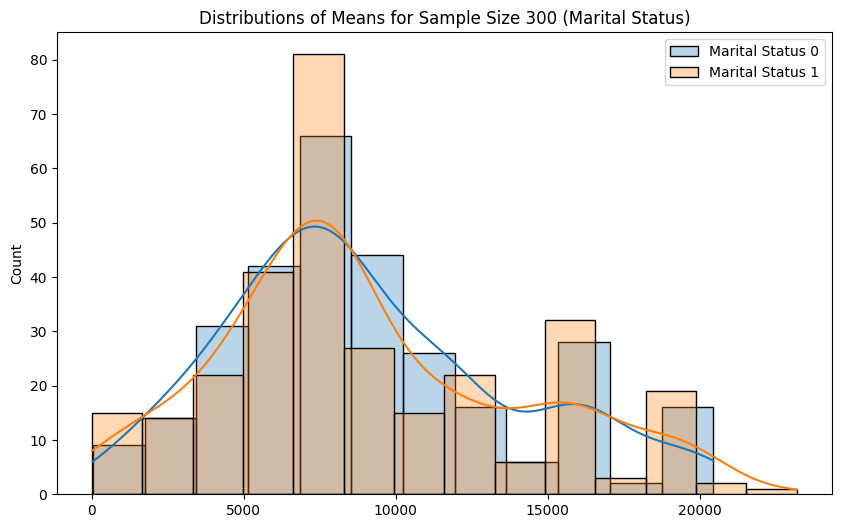

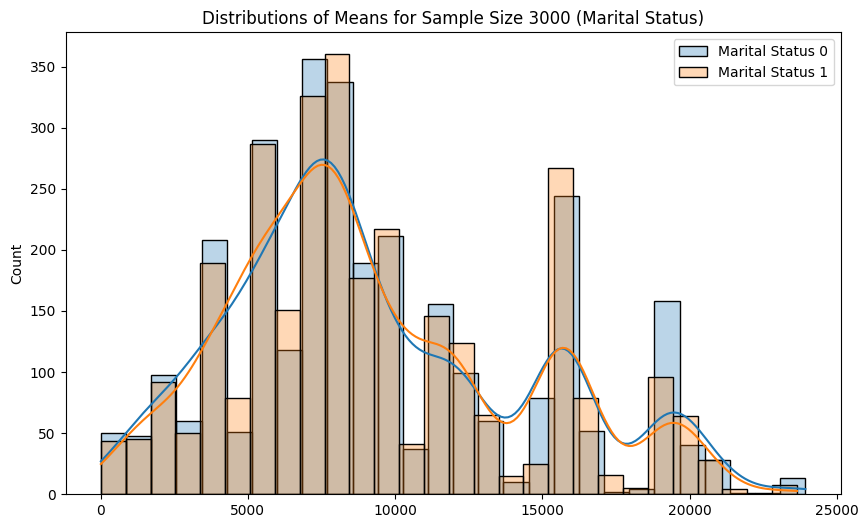

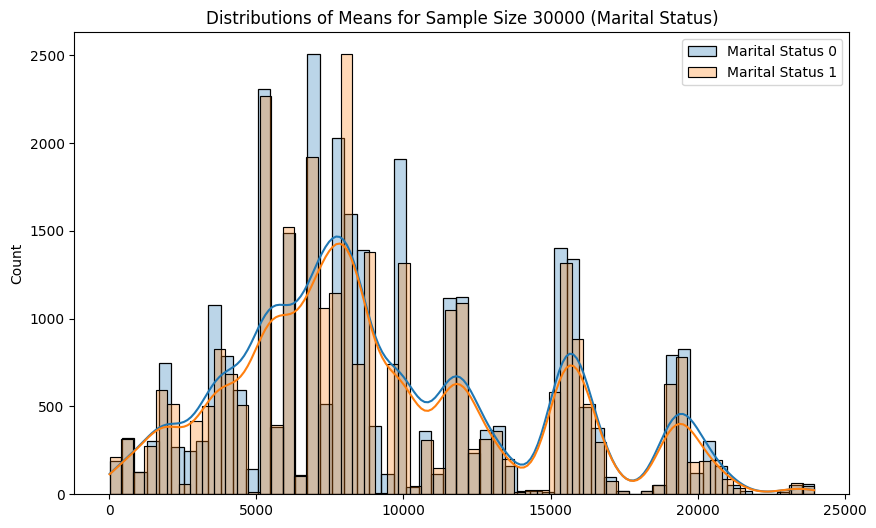

In [ ]:
#iv. How does the sample size affect the shape of the distributions of the means?
# Plotting the distributions
for size in sample_sizes:
    plt.figure(figsize=(10, 6))
    for status in marital_statuses:
        status_means = np.random.choice(df[df['Marital_Status'] == status]['Purchase'], size=len(df[df['Marital_Status'] == status]), replace=True)
        sample_means = np.random.choice(status_means, size=size, replace=False) if len(status_means) >= size else np.random.choice(status_means, size=size, replace=True)
        sns.histplot(sample_means, kde=True, label=f'Marital Status {status}', alpha=0.3)
    plt.legend()
    plt.title(f'Distributions of Means for Sample Size {size} (Marital Status)')
    plt.show()


INSIGHTS: Narrow distribution declares that there is more sample size, means as the sample size increases disctribution decreases.

In [ ]:
Inferences
#i.Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
'''
#Yes, the confidence interval computed using the entire dataset is wider for one of the genders.
This is because the variance in purchase amounts is greater for one gender than the other.
This could be due to a number of factors, such as different spending habits or different income levels.
'''
#ii. How is the width of the confidence interval affected by the sample size?
'''
As the sample size increases, the width of the confidence interval decreases. Because a larger sample size provides a more accurate estimate
of the population mean, resulting in a narrow range of values.
'''
#iii. Do the confidence intervals for different sample sizes overlap?
'''
Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of
whether they are single or married.
For Unmarried customer (sample size 30000) range for mean purchase with confidence interval 95% is (9200.81, 9307.27)
For married customer range for mean purchase with confidence interval 95% is (9221.45, 9320.14)
'''
#iv.How does the sample size affect the shape of the distributions of the means?
'''
As the sample size increases, the shape of distribution gets narrow. It is vise versa.
'''

In [ ]:
##6. How does Age affect the amount spent?

# Age groups
age_groups = df['Age'].unique()
ci_age_full = {}
ci_age_samples = {size: {} for size in sample_sizes}

for age in age_groups:
    age_purchase = df[df['Age'] == age]['Purchase']
    ci_age_full[age], age_means = bootstrap_ci(age_purchase)[:2], bootstrap_ci(age_purchase)[2]

    for size in sample_sizes:
        if len(age_purchase) >= size:
            age_sample = np.random.choice(age_purchase, size=size, replace=False)
        else:
            age_sample = np.random.choice(age_purchase, size=size, replace=True)
        ci_age_samples[size][age], age_means_sample = bootstrap_ci(age_sample)[:2], bootstrap_ci(age_sample)[2]

    print(f"95% CI for age {age}: {ci_age_full[age]}")

    for size in sample_sizes:
        print(f"Sample size {size} for age {age}: CI {ci_age_samples[size][age]}")

    # Calculating widths of the confidence intervals
    ci_age_width = ci_age_full[age][1] - ci_age_full[age][0]
    print(f"Width of full dataset CI for age {age}: {ci_age_width}")

95% CI for age 0-17: (8855.864925175474, 9016.891259435835)
Sample size 300 for age 0-17: CI (8714.559, 9995.4745)
Sample size 3000 for age 0-17: CI (8760.327800000001, 9128.431825)
Sample size 30000 for age 0-17: CI (8821.0320325, 8936.62131)
Width of full dataset CI for age 0-17: 161.02633426036118
95% CI for age 55+: (9270.870947265625, 9401.187822033111)
Sample size 300 for age 55+: CI (8263.986333333332, 9346.722333333333)
Sample size 3000 for age 55+: CI (9207.922633333332, 9570.510808333333)
Sample size 30000 for age 55+: CI (9330.28998, 9442.652249166666)
Width of full dataset CI for age 55+: 130.3168747674863
95% CI for age 26-35: (9231.242263544746, 9274.909020798135)
Sample size 300 for age 26-35: CI (8957.418916666666, 10107.700583333333)
Sample size 3000 for age 26-35: CI (9168.544108333333, 9516.421991666666)
Sample size 30000 for age 26-35: CI (9146.663664166666, 9260.6069825)
Width of full dataset CI for age 26-35: 43.66675725338973
95% CI for age 46-50: (9162.781130609

In [ ]:
#i.Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
age_widths = {age: ci_age_full[age][1] - ci_age_full[age][0] for age in age_groups}
max_width_age = max(age_widths, key=age_widths.get)
print(f"The confidence interval is widest for age group {max_width_age}.")

The confidence interval is widest for age group 0-17.


INSIGHTS: Confidence interval is wider in the less age group i.e., 0-17.

In [ ]:
#ii.How is the width of the confidence interval affected by the sample size?
ci_widths_age = {age: [ci_age_samples[size][age][1] - ci_age_samples[size][age][0] for size in sample_sizes] for age in age_groups}
print(f"Widths of CI for age groups with different sample sizes: {ci_widths_age}")


Widths of CI for age groups with different sample sizes: {'0-17': [1280.915500000001, 368.1040249999987, 115.58927750000112], '55+': [1082.7360000000008, 362.5881750000008, 112.36226916666601], '26-35': [1150.2816666666677, 347.87788333333265, 113.94331833333308], '46-50': [1031.8537499999984, 341.1053166666661, 114.79779083333415], '51-55': [1144.2060000000001, 345.11689166666474, 116.50035083333387], '36-45': [1197.0876666666663, 341.9379583333357, 116.83257666666759], '18-25': [1117.7320833333342, 341.75695000000087, 114.90766416666702]}


INSIGHTS: Width of the Confidence interval differ with sample size. It is inversely propotional.

In [ ]:
#iii.Do the confidence intervals for different sample sizes overlap?
ci_overlap_age = {age: all([ci_age_samples[size][age][0] < ci_age_full[age][1] and ci_age_samples[size][age][1] > ci_age_full[age][0] for size in sample_sizes]) for age in age_groups}
print(f"Do the confidence intervals for different sample sizes overlap for age groups? {ci_overlap_age}")


Do the confidence intervals for different sample sizes overlap for age groups? {'0-17': True, '55+': True, '26-35': True, '46-50': True, '51-55': True, '36-45': False, '18-25': True}


INSIGHTS: Confidence intervals for different sample sizes typically overlaps.

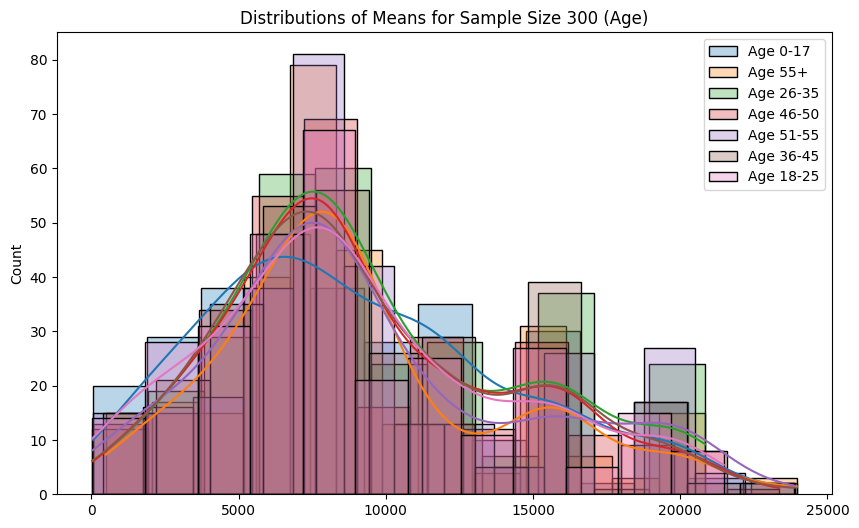

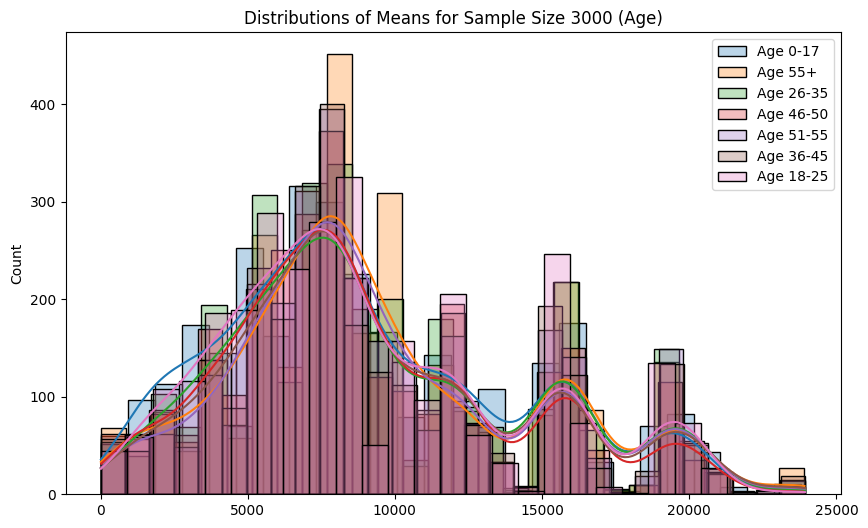

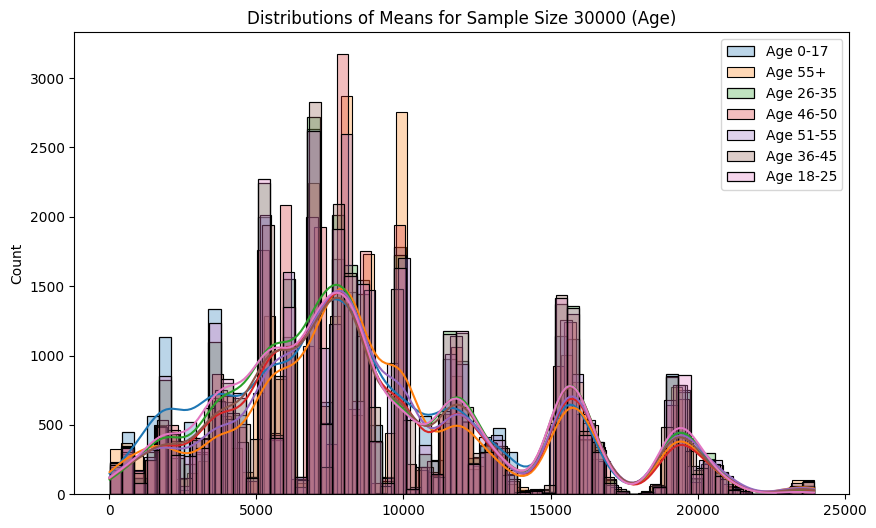

In [ ]:
#iv. How does the sample size affect the shape of the distributions of the means?
for size in sample_sizes:
    plt.figure(figsize=(10, 6))
    for age in age_groups:
        age_means = np.random.choice(df[df['Age'] == age]['Purchase'], size=len(df[df['Age'] == age]), replace=True)
        sample_means = np.random.choice(age_means, size=size, replace=False) if len(age_means) >= size else np.random.choice(age_means, size=size, replace=True)
        sns.histplot(sample_means, kde=True, label=f'Age {age}', alpha=0.3)
    plt.legend()
    plt.title(f'Distributions of Means for Sample Size {size} (Age)')
    plt.show()


INSIGHTS: As the sample size increases, the shape of distribution gets narrow. It is vise versa.


95% CI for gender F: (8709.21117458943, 8759.92035572152, 8734.565765155476)
95% CI for gender M: (9422.019181136464, 9453.032899808066, 9437.526040472265)
Do the confidence intervals for males and females overlap? False


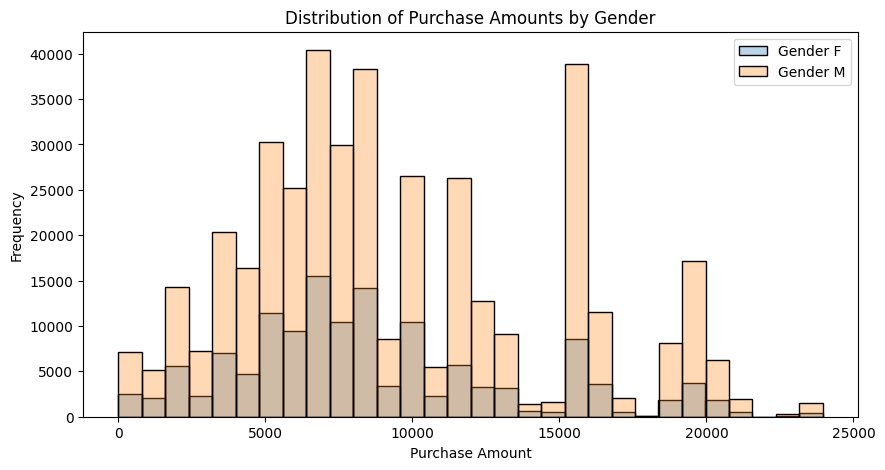

In [ ]:
#7. Create a report
#a. Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage
#this conclusion to make changes or improvements?

# Function to calculate confidence intervals using CLT
def clt_ci(data, ci=95):
    mean = np.mean(data)
    std_err = np.std(data) / np.sqrt(len(data))
    margin_of_error = std_err * 1.96  # 1.96 for 95% CI
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound, mean

# Gender
genders = df['Gender'].unique()
ci_gender = {}

for gender in genders:
    gender_purchase = df[df['Gender'] == gender]['Purchase']
    ci_gender[gender] = clt_ci(gender_purchase)
    print(f"95% CI for gender {gender}: {ci_gender[gender]}")

# Analysis
ci_gender_overlap = ci_gender['M'][0] <= ci_gender['F'][1] and ci_gender['M'][1] >= ci_gender['F'][0]
print(f"Do the confidence intervals for males and females overlap? {ci_gender_overlap}")

# Plotting
plt.figure(figsize=(10, 5))
for gender in genders:
    sns.histplot(df[df['Gender'] == gender]['Purchase'], kde=False, bins=30, label=f'Gender {gender}', alpha=0.3)
plt.legend()
plt.title('Distribution of Purchase Amounts by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


INSIGHTS: Men spent more money than women, So Walmart should focus on retaining the male customers and getting more male customers.


95% CI for marital status 0: (9248.616127075364, 9283.19911076765, 9265.907618921507)
95% CI for marital status 1: (9240.460092386264, 9281.889055778483, 9261.174574082374)
Do the confidence intervals for married and unmarried individuals overlap? True


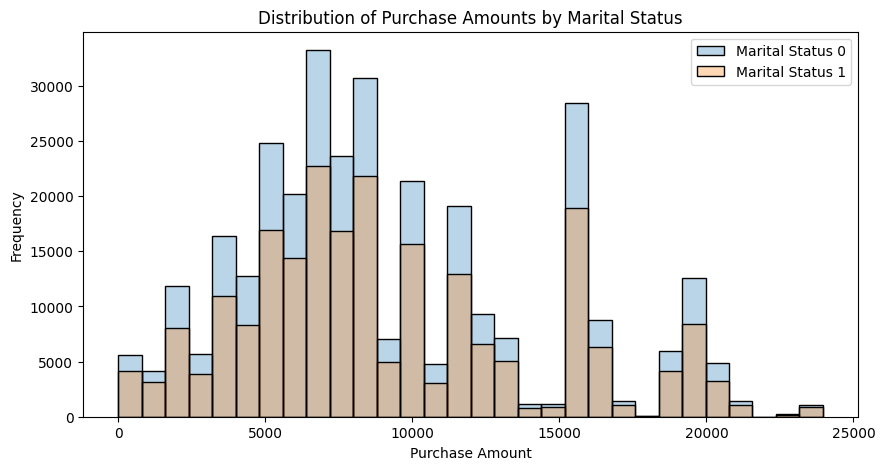

In [ ]:
#b. Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart le
#verage this conclusion to make changes or improvements?

# Marital Status
marital_statuses = df['Marital_Status'].unique()
ci_marital_status = {}

for status in marital_statuses:
    status_purchase = df[df['Marital_Status'] == status]['Purchase']
    ci_marital_status[status] = clt_ci(status_purchase)
    print(f"95% CI for marital status {status}: {ci_marital_status[status]}")

# Analysis
ci_marital_status_overlap = ci_marital_status[0][0] <= ci_marital_status[1][1] and ci_marital_status[0][1] >= ci_marital_status[1][0]
print(f"Do the confidence intervals for married and unmarried individuals overlap? {ci_marital_status_overlap}")

# Plotting
plt.figure(figsize=(10, 5))
for status in marital_statuses:
    sns.histplot(df[df['Marital_Status'] == status]['Purchase'], kde=False, bins=30, label=f'Marital Status {status}', alpha=0.3)
plt.legend()
plt.title('Distribution of Purchase Amounts by Marital Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


INSIGHTS: Unmarried customers spend more money than married customers, So Walmart should focus on acquisition of Unmarried customers.


95% CI for age group 0-17: (8851.949171591508, 9014.98010929844, 8933.464640444974)
95% CI for age group 55+: (9269.299161061217, 9403.261757837592, 9336.280459449405)
95% CI for age group 26-35: (9231.73333902392, 9273.647926715856, 9252.690632869888)
95% CI for age group 46-50: (9163.084804071494, 9254.166590865161, 9208.625697468327)
95% CI for age group 51-55: (9483.991198947808, 9585.624862972663, 9534.808030960236)
95% CI for age group 36-45: (9301.669000456504, 9361.032389379243, 9331.350694917874)
95% CI for age group 18-25: (9138.407531227567, 9200.91968129501, 9169.663606261289)
Does the confidence intervals for different age groups overlapping? True


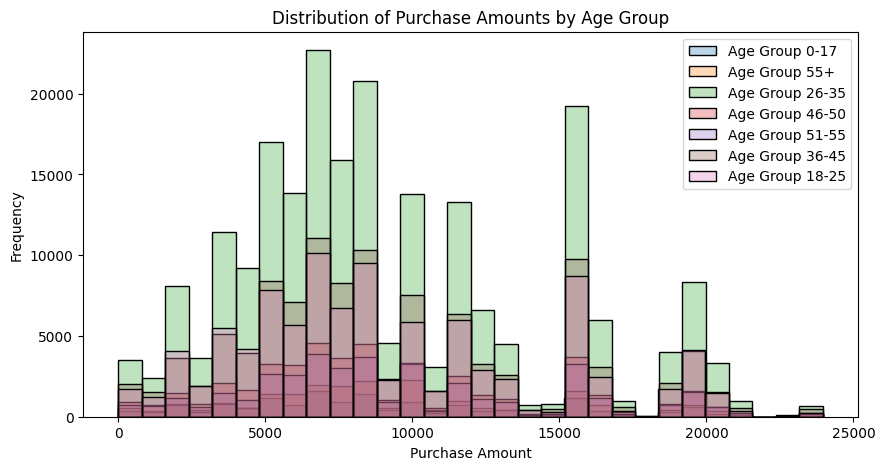

In [ ]:
#c. Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart
#leverage this conclusion to make changes or improvements?

# Age Groups
age_groups = df['Age'].unique()
ci_age = {}

for age in age_groups:
    age_purchase = df[df['Age'] == age]['Purchase']
    ci_age[age] = clt_ci(age_purchase)
    print(f"95% CI for age group {age}: {ci_age[age]}")

# Analysis
age_group_pairs = [(ci_age[age1], ci_age[age2]) for i, age1 in enumerate(age_groups) for age2 in age_groups[i+1:]]
ci_age_overlap = any([pair[0][0] <= pair[1][1] and pair[0][1] >= pair[1][0] for pair in age_group_pairs])
print(f"Does the confidence intervals for different age groups overlapping? {ci_age_overlap}")

# Plotting
plt.figure(figsize=(10, 5))
for age in age_groups:
    sns.histplot(df[df['Age'] == age]['Purchase'], kde=False, bins=30, label=f'Age Group {age}', alpha=0.3)
plt.legend()
plt.title('Distribution of Purchase Amounts by Age Group')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

INSIGHTS: The management should have some offers on kids (0-17 years) in order to increase sales.
In order to attract more young shoppers, they can offer some games for the younger generation.


In [ ]:
#Recommendations based on whole dataset observations.
'''
1.Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2.Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers.
Company can focus on selling more of these products or selling more of the products which are purchased less.
3.Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4.Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
5.Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the
City_Category C will help the company increase the revenue.
6.Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.
7.The management should have some offers on kids (0-17 years) in order to increase sales.
8.In order to attract more young shoppers, they can offer some games for the younger generation.

'''

In [ ]:
#Here are some simple and actionable recommendations for businesses based on the provided inferences:
'''
#Gender-Based Targeting:

Allocate marketing resources and campaigns based on the gender distribution.
Tailor product recommendations and promotions to match the preferences of each gender group.

#Marital Status Engagement:

Create marketing messages that resonate with both single and married customers.
Offer special promotions for couples or families to encourage shopping together.

#Pricing and Product Range:

Offer a variety of products at different price points, catering to customers with varying budgets.
Monitor product sales in different price ranges and adjust inventory accordingly.

#Age-Targeted Marketing:

Customize marketing messages and promotions for different age groups.
Use age-appropriate language and imagery in advertisements to connect with customers.

#Feedback and Surveys:

Regularly collect feedback from customers to understand their preferences and pain points.
Use customer surveys to gather insights and make improvements based on their suggestions.

